In [1]:
import pandas

pandas.read_csv('athlete_events.csv')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [14]:
import pandas as pd

dane = pandas.read_csv('athlete_events.csv')
column = dane['Age']

In [9]:
age = dane[(dane['Age'] < 60) & (dane['Season'] == 'Summer')]

# Podziel dane na dwie grupy: mężczyzn i kobiety
mezczyzni = age[age['Sex'] == 'M']['Age']
kobiety = age[age['Sex'] == 'F']['Age']

print(kobiety)
print(mezczyzni)

26        18.0
27        18.0
32        30.0
33        34.0
79        27.0
          ... 
271080    33.0
271099    36.0
271102    19.0
271103    23.0
271110    33.0
Name: Age, Length: 58952, dtype: float64
0         24.0
1         23.0
2         24.0
3         34.0
29        26.0
          ... 
271105    23.0
271106    27.0
271107    21.0
271108    24.0
271109    28.0
Name: Age, Length: 153753, dtype: float64


In [10]:
summer_data = dane[dane['Season'] == 'Summer']
print(summer_data)


            ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
26           8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
271106  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
271107  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
271108  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
271109  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
271110  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Game

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

age = dane[(dane['Age'] < 60) & (dane['Season'] == 'Summer')]

# Podziel dane na dwie grupy: mężczyzn i kobiety
mezczyzni = age[age['Sex'] == 'M']['Age']
kobiety = age[age['Sex'] == 'F']['Age']

def srednia_arytmetyczna(dane):
    return np.sum(dane) / len(dane)

print(np.mean(kobiety))
print(srednia_arytmetyczna(kobiety))

def srednia_arytmetyczna(dane):
    return np.sum(dane) / len(dane)

print(np.mean(mezczyzni))
print(srednia_arytmetyczna(mezczyzni))


23.606832677432486
23.606832677432486
26.295747074853825
26.295747074853825


In [12]:
from scipy.stats import hmean

def srednia_harmoniczna(dane):
    return len(dane) / np.sum(1 / dane)


print(hmean(kobiety))
print(srednia_harmoniczna(kobiety))

print(hmean(mezczyzni))
print(srednia_harmoniczna(mezczyzni))


22.302879104067753
22.302879104067753
25.05433286246757
25.05433286246757


In [15]:
def srednia_winsorowska(dane, k):
    n = len(dane)
    posortowane_dane = np.sort(dane)
    koniec = n - k -1
    poczatek = k + 1
    obciete = posortowane_dane[poczatek:koniec]
    return (1 / n) * ((k + 1) * posortowane_dane[k + 1] + np.sum(obciete) + (k + 1) * posortowane_dane[n - k])

# Usunięcie wartości nieliczbowych z kolumny 'Age'
dane['Age'] = pd.to_numeric(dane['Age'], errors='coerce')

# Usunięcie wierszy zawierających wartości NaN w kolumnie 'Age'
dane = dane.dropna(subset=['Age'])

# Konwersja kolumny 'Age' na liczby całkowite
dane['Age'] = dane['Age'].astype(int)

# Filtrowanie danych
age = dane[(dane['Age'] < 60) & (dane['Season'] == 'Summer')]


mezczyzni = age[age['Sex'] == 'M']['Age']
kobiety = age[age['Sex'] == 'F']['Age']

print(srednia_winsorowska(mezczyzni, 76876))
print(srednia_winsorowska(kobiety, 29476))



25.00016259845336
23.0007802958339


In [16]:
from scipy.stats import gmean

def srednia_geometryczna(dane):
    return np.prod(np.power(dane, 1 / len(dane)))

print(gmean(kobiety))
print(srednia_geometryczna(kobiety))
print(gmean(mezczyzni))
print(srednia_geometryczna(mezczyzni))

22.93519248533428
22.935192485308363
25.63590268701086
25.635902686939428


In [17]:
def srednia_ucinana(dane, k):
    n = len(dane)
    poczatek = k
    koniec = n - k
    posortowane_dane = np.sort(dane)
    obcieta = posortowane_dane[poczatek:koniec]
    return (1 / (n - (2 * k))) * np.sum(obcieta)

# Usunięcie wartości nieliczbowych z kolumny 'Age'
dane['Age'] = pd.to_numeric(dane['Age'], errors='coerce')

# Usunięcie wierszy zawierających wartości NaN w kolumnie 'Age'
dane = dane.dropna(subset=['Age'])

# Konwersja kolumny 'Age' na liczby całkowite
dane['Age'] = dane['Age'].astype(int)

# Filtrowanie danych
age = dane[(dane['Age'] < 60) & (dane['Season'] == 'Summer')]

print(srednia_ucinana(mezczyzni, 76875))
print(srednia_ucinana(kobiety, 29475))


25.0
23.0


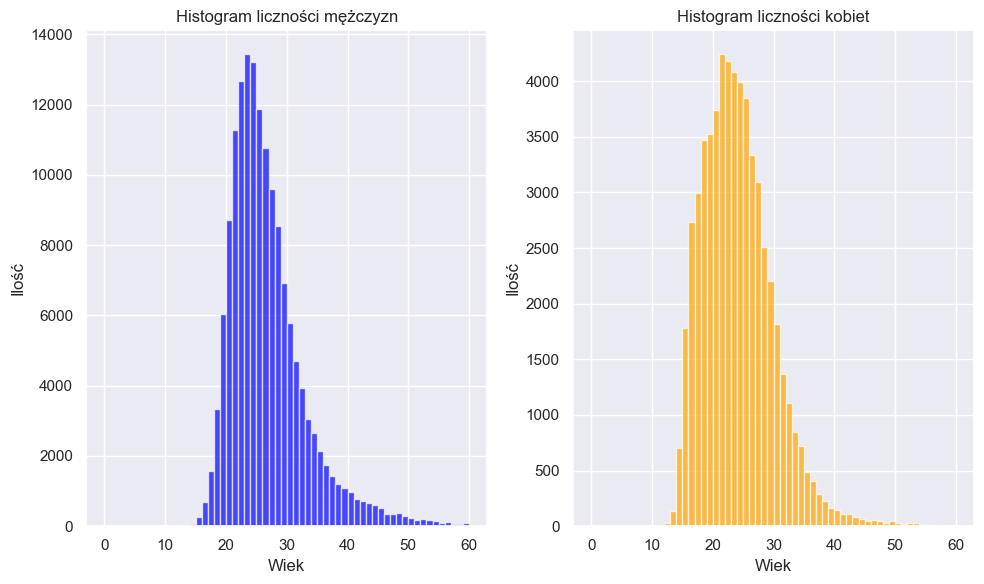

In [199]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrowanie danych na podstawie wieku (<60) i sezonu letniego
age = dane[(dane['Age'] < 60) & (dane['Season'] == 'Summer')]

# Tworzenie osobnych histogramów dla obu płci
plt.figure(figsize=(10, 6))

# Histogram dla mężczyzn
plt.subplot(1, 2, 1)
plt.hist(age[age['Sex'] == 'M']['Age'], bins=range(0, 61, 1), color='blue', alpha=0.7)
plt.title('Histogram liczności mężczyzn')
plt.xlabel('Wiek')
plt.ylabel('Ilość')

# Histogram dla kobiet
plt.subplot(1, 2, 2)
plt.hist(age[age['Sex'] == 'F']['Age'], bins=range(0, 61, 1), color='orange', alpha=0.7)
plt.title('Histogram liczności kobiet')
plt.xlabel('Wiek')
plt.ylabel('Ilość')

plt.tight_layout()
plt.show()


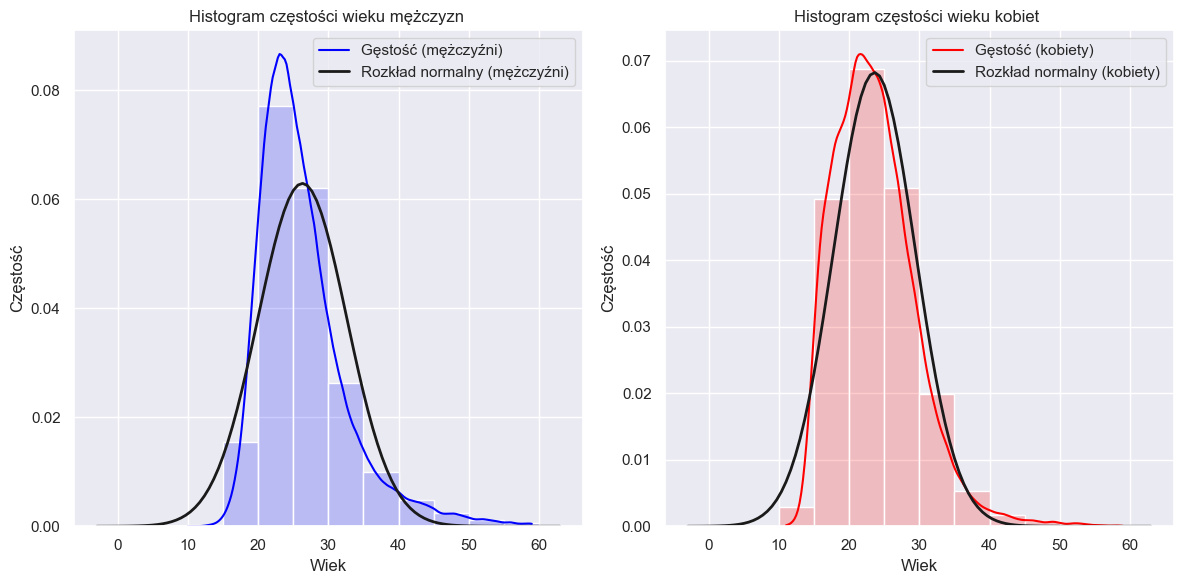

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np

# Filtrowanie danych na podstawie wieku (<60) i sezonu letniego
age = dane[(dane['Age'] < 60) & (dane['Season'] == 'Summer')]

# Tworzenie histogramu częstości wzrostu dla kolejnej dekady
plt.figure(figsize=(12, 6))

# Histogram dla mężczyzn
plt.subplot(1, 2, 1)
sns.histplot(age[age['Sex'] == 'M']['Age'], bins=range(0, 61, 5), color='blue', alpha=0.2, kde=True, fill=True, stat='density')
plt.title('Histogram częstości wieku mężczyzn ')
plt.xlabel('Wiek')
plt.ylabel('Częstość')
# Krzywa gęstości dla rozkładu normalnego
mean_m = age[age['Sex'] == 'M']['Age'].mean()
std_m = age[age['Sex'] == 'M']['Age'].std()
xmin, xmax = plt.xlim()
x_m = np.linspace(xmin, xmax, 100)
p_m = norm.pdf(x_m, mean_m, std_m)
plt.plot(x_m, p_m, 'k', linewidth=2, label='Rozkład normalny (mężczyźni)')
plt.legend([ 'Gęstość (mężczyźni)','Rozkład normalny (mężczyźni)'])

# Histogram dla kobiet
plt.subplot(1, 2, 2)
sns.histplot(age[age['Sex'] == 'F']['Age'], bins=range(0, 61, 5), color='red', alpha=0.2, kde=True, fill=True, stat='density')
plt.title('Histogram częstości wieku kobiet ')
plt.xlabel('Wiek')
plt.ylabel('Częstość')

# Krzywa gęstości dla rozkładu normalnego
mean_f = age[age['Sex'] == 'F']['Age'].mean()
std_f = age[age['Sex'] == 'F']['Age'].std()
xmin, xmax = plt.xlim()
x_f = np.linspace(xmin, xmax, 100)
p_f = norm.pdf(x_f, mean_f, std_f)
plt.plot(x_f, p_f, 'k', linewidth=2, label='Rozkład normalny (kobiety)')  # Adding label for legend
plt.legend(['Gęstość (kobiety)','Rozkład normalny (kobiety)' ])

plt.tight_layout()
plt.show()



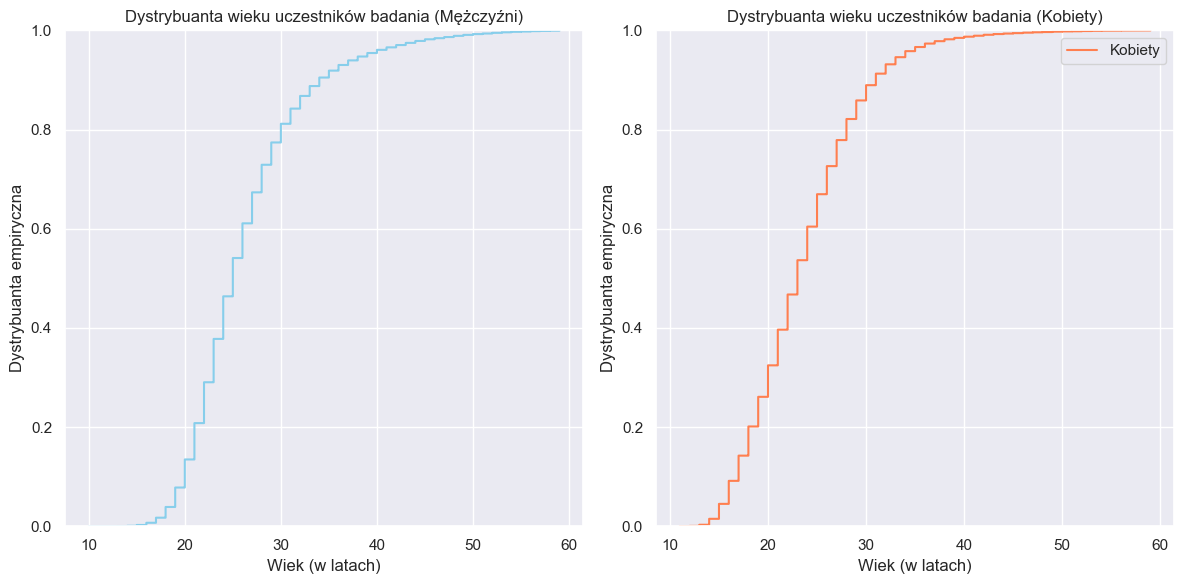

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Filtrowanie danych na podstawie wieku (<60) i sezonu letniego
age = dane[(dane['Age'] < 60) & (dane['Season'] == 'Summer')]

# Tworzenie histogramu częstości wzrostu dla kolejnej dekadyk

plt.figure(figsize=(12, 6))

# Dystrybuanta empiryczna dla mężczyzn
plt.subplot(1, 2, 1)
sns.ecdfplot(data=age[age['Sex'] == 'M'], x='Age', color='skyblue', label='Mężczyźni')
plt.title('Dystrybuanta wieku uczestników badania (Mężczyźni)')
plt.xlabel('Wiek (w latach)')
plt.ylabel('Dystrybuanta empiryczna')
plt.grid(True)

# Dystrybuanta empiryczna dla kobiet
plt.subplot(1, 2, 2)
sns.ecdfplot(data=age[age['Sex'] == 'F'], x='Age', color='coral', marker='o', 
             markersize=0, label='Kobiety')
plt.title('Dystrybuanta wieku uczestników badania (Kobiety)')
plt.xlabel('Wiek (w latach)')
plt.ylabel('Dystrybuanta empiryczna')
plt.grid(True)

# Dodanie legendy
plt.legend()

plt.tight_layout()
plt.show()

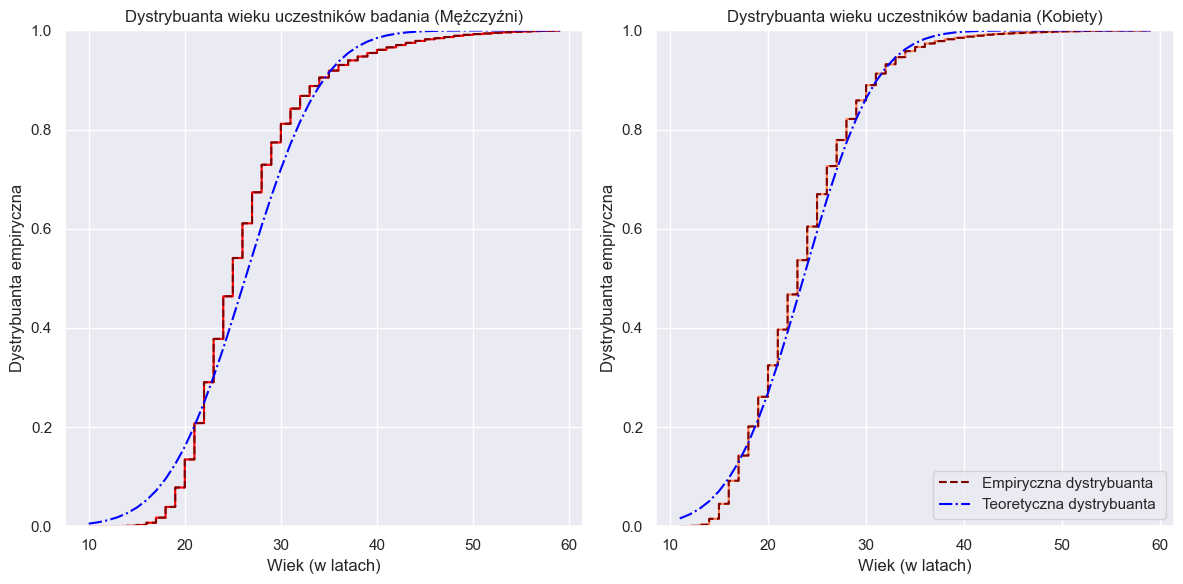

In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Filtrowanie danych na podstawie wieku (<60) i sezonu letniego
age = dane[(dane['Age'] < 60) & (dane['Season'] == 'Summer')]

# Tworzenie histogramu częstości wzrostu dla kolejnej dekady
plt.figure(figsize=(12, 6))

# Dystrybuanta empiryczna dla mężczyzn
plt.subplot(1, 2, 1)
sns.ecdfplot(data=age[age['Sex'] == 'M'], x='Age', color='red', label='Mężczyźni')
x_m = age[age['Sex'] == 'M']['Age']
y_m = np.arange(1, len(x_m) + 1) / len(x_m)
plt.plot(np.sort(x_m), y_m, color='maroon', linestyle='--', label='Empiryczna dystrybuanta (Mężczyźni)')
plt.plot(np.sort(x_m), norm.cdf(np.sort(x_m), loc=x_m.mean(), scale=x_m.std()), color='blue', linestyle='-.', label='Teoretyczna dystrybuanta (Mężczyźni)')
plt.title('Dystrybuanta wieku uczestników badania (Mężczyźni)')
plt.xlabel('Wiek (w latach)')
plt.ylabel('Dystrybuanta empiryczna')
plt.grid(True)

# Dystrybuanta empiryczna dla kobiet
plt.subplot(1, 2, 2)
sns.ecdfplot(data=age[age['Sex'] == 'F'], x='Age', color='coral', marker='o', markersize=0)
x_f = age[age['Sex'] == 'F']['Age']
y_f = np.arange(1, len(x_f) + 1) / len(x_f)
plt.plot(np.sort(x_f), y_f, color='maroon', linestyle='--', label='Empiryczna dystrybuanta')
plt.plot(np.sort(x_f), norm.cdf(np.sort(x_f), loc=x_f.mean(), scale=x_f.std()), color='blue', linestyle='-.', label='Teoretyczna dystrybuanta ')
plt.title('Dystrybuanta wieku uczestników badania (Kobiety)')
plt.xlabel('Wiek (w latach)')
plt.ylabel('Dystrybuanta empiryczna')
plt.grid(True)

# Dodanie legendy
plt.legend()

plt.tight_layout()
plt.show()



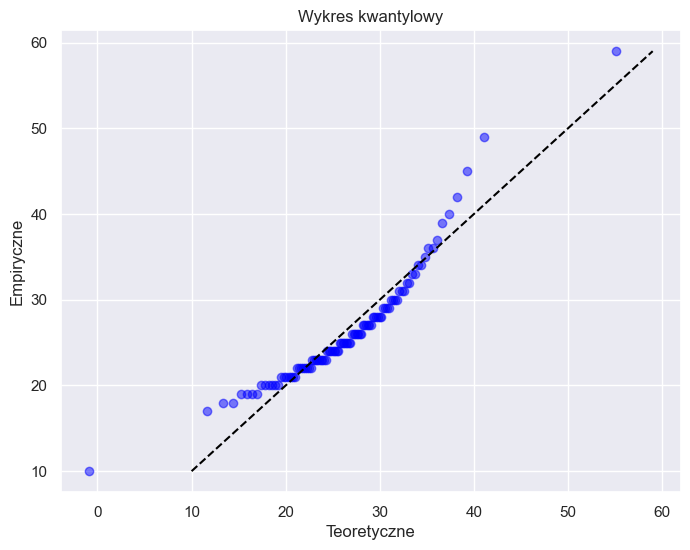

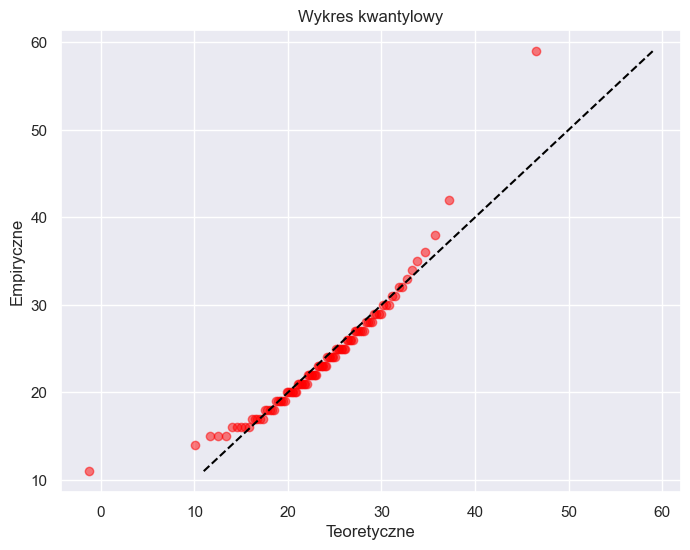

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Filtrowanie danych na podstawie wieku (<60) i sezonu letniego
age = dane[(dane['Age'] < 60) & (dane['Season'] == 'Summer')]

# Podziel dane na dwie grupy: mężczyzn i kobiety
mezczyzni = age[age['Sex'] == 'M']['Age']
kobiety = age[age['Sex'] == 'F']['Age']

# Tworzenie wykresu kwantylowego dla mężczyzn
plt.figure(figsize=(8, 6))
quantiles_m = np.percentile(mezczyzni, np.linspace(0, 100, 100))
normal_sample_m = np.random.normal(loc=mezczyzni.mean(), scale=mezczyzni.std(), size=len(mezczyzni))
quantiles_normal_m = np.percentile(normal_sample_m, np.linspace(0, 100, 100))
plt.scatter(quantiles_normal_m, quantiles_m, color='blue', alpha=0.5, label='Male QQ Plot')
plt.plot([quantiles_m.min(), quantiles_m.max()], [quantiles_m.min(), quantiles_m.max()], color='black', linestyle='--')

# Ustawienia osi i tytułu
plt.title("Wykres kwantylowy")
plt.xlabel('Teoretyczne')
plt.ylabel('Empiryczne')


# Tworzenie wykresu kwantylowego dla kobiet
plt.figure(figsize=(8, 6))
quantiles_f = np.percentile(kobiety, np.linspace(0, 100, 100))
normal_sample_f = np.random.normal(loc=kobiety.mean(), scale=kobiety.std(), size=len(kobiety))
quantiles_normal_f = np.percentile(normal_sample_f, np.linspace(0, 100, 100))
plt.scatter(quantiles_normal_f, quantiles_f, color='red', alpha=0.5, label='Female QQ Plot')
plt.plot([quantiles_f.min(), quantiles_f.max()], [quantiles_f.min(), quantiles_f.max()], color='black', linestyle='--')

# Ustawienia osi i tytułu
plt.title("Wykres kwantylowy")
plt.xlabel('Teoretyczne')
plt.ylabel('Empiryczne')


plt.show()


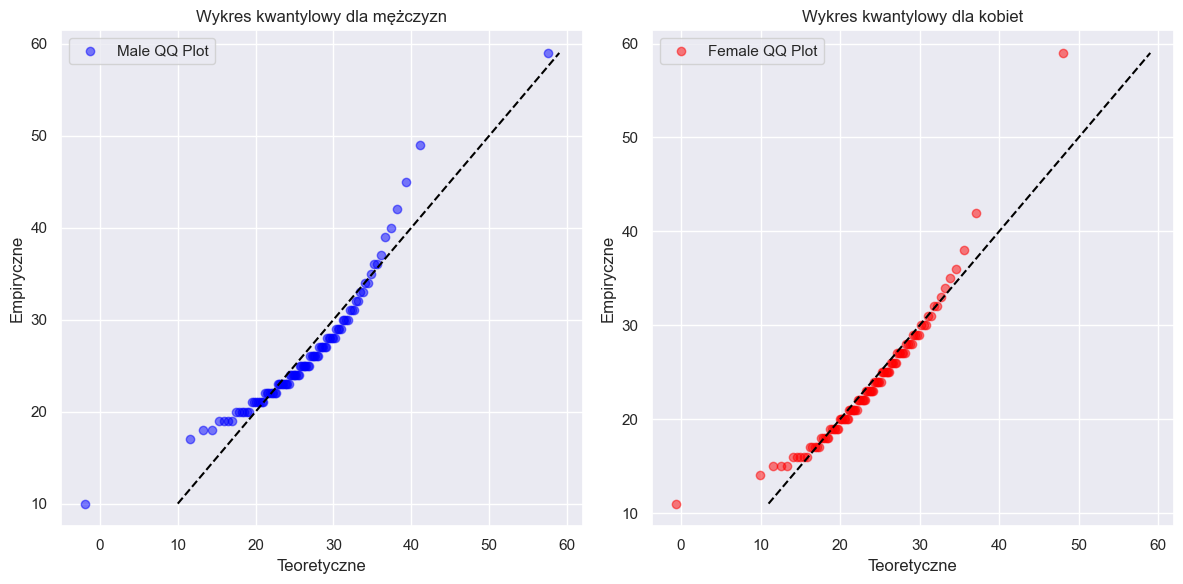

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Filtrowanie danych na podstawie wieku (<60) i sezonu letniego
age = dane[(dane['Age'] < 60) & (dane['Season'] == 'Summer')]

# Podziel dane na dwie grupy: mężczyzn i kobiety
mezczyzni = age[age['Sex'] == 'M']['Age']
kobiety = age[age['Sex'] == 'F']['Age']

# Tworzenie wykresu kwantylowego
plt.figure(figsize=(12, 6))

# Wykres kwantylowy dla mężczyzn
plt.subplot(1, 2, 1)
quantiles_m = np.percentile(mezczyzni, np.linspace(0, 100, 100))
normal_sample_m = np.random.normal(loc=mezczyzni.mean(), scale=mezczyzni.std(), size=len(mezczyzni))
quantiles_normal_m = np.percentile(normal_sample_m, np.linspace(0, 100, 100))
plt.scatter(quantiles_normal_m, quantiles_m, color='blue', alpha=0.5, label='Male QQ Plot')
plt.plot([quantiles_m.min(), quantiles_m.max()], [quantiles_m.min(), quantiles_m.max()], color='black', linestyle='--')
plt.title("Wykres kwantylowy dla mężczyzn")
plt.xlabel('Teoretyczne')
plt.ylabel('Empiryczne')
plt.legend()

# Wykres kwantylowy dla kobiet
plt.subplot(1, 2, 2)
quantiles_f = np.percentile(kobiety, np.linspace(0, 100, 100))
normal_sample_f = np.random.normal(loc=kobiety.mean(), scale=kobiety.std(), size=len(kobiety))
quantiles_normal_f = np.percentile(normal_sample_f, np.linspace(0, 100, 100))
plt.scatter(quantiles_normal_f, quantiles_f, color='red', alpha=0.5, label='Female QQ Plot')
plt.plot([quantiles_f.min(), quantiles_f.max()], [quantiles_f.min(), quantiles_f.max()], color='black', linestyle='--')
plt.title("Wykres kwantylowy dla kobiet")
plt.xlabel('Teoretyczne')
plt.ylabel('Empiryczne')
plt.legend()

plt.tight_layout()
plt.show()



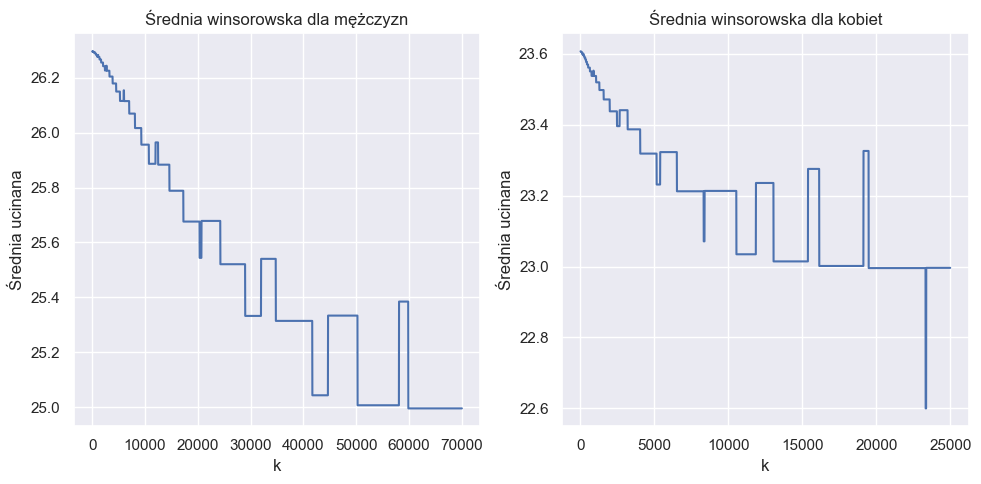

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def srednia_winsorowska(dane, k):
    n = len(dane)
    posortowane_dane = np.sort(dane)
    koniec = n - k - 1
    poczatek = k + 1
    obciete = posortowane_dane[poczatek:koniec]
    return (1 / n) * ((k + 1) * posortowane_dane[k + 1] + np.sum(obciete) + (k + 1) * posortowane_dane[n - k])

# Usunięcie wartości nieliczbowych z kolumny 'Age'
dane['Age'] = pd.to_numeric(dane['Age'], errors='coerce')

# Usunięcie wierszy zawierających wartości NaN w kolumnie 'Age'
dane = dane.dropna(subset=['Age'])

# Konwersja kolumny 'Age' na liczby całkowite
dane['Age'] = dane['Age'].astype(int)

# Filtrowanie danych dla kobiet i mężczyzn
mezczyzni = dane[(dane['Sex'] == 'M') & (dane['Age'] < 60) & (dane['Season'] == 'Summer')]
kobiety = dane[(dane['Sex'] == 'F') & (dane['Age'] < 60) & (dane['Season'] == 'Summer')]

# Tworzenie listy wartości k dla mężczyzn i kobiet
k_values_m = np.arange(1, 70000, 10)
k_values_f = np.arange(1, 25000, 10)

# Obliczanie średnich uciętych dla różnych wartości k dla mężczyzn i kobiet
ucinane_means_m = [srednia_winsorowska(mezczyzni['Age'], k) for k in k_values_m]
ucinane_means_f = [srednia_winsorowska(kobiety['Age'], k) for k in k_values_f]

# Tworzenie wykresów dla mężczyzn i kobiet
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values_m, ucinane_means_m)
plt.title("Średnia winsorowska dla mężczyzn")
plt.xlabel("k")
plt.ylabel("Średnia ucinana")

plt.subplot(1, 2, 2)
plt.plot(k_values_f, ucinane_means_f)
plt.title("Średnia winsorowska dla kobiet")
plt.xlabel("k")
plt.ylabel("Średnia ucinana")

plt.tight_layout()
plt.show()


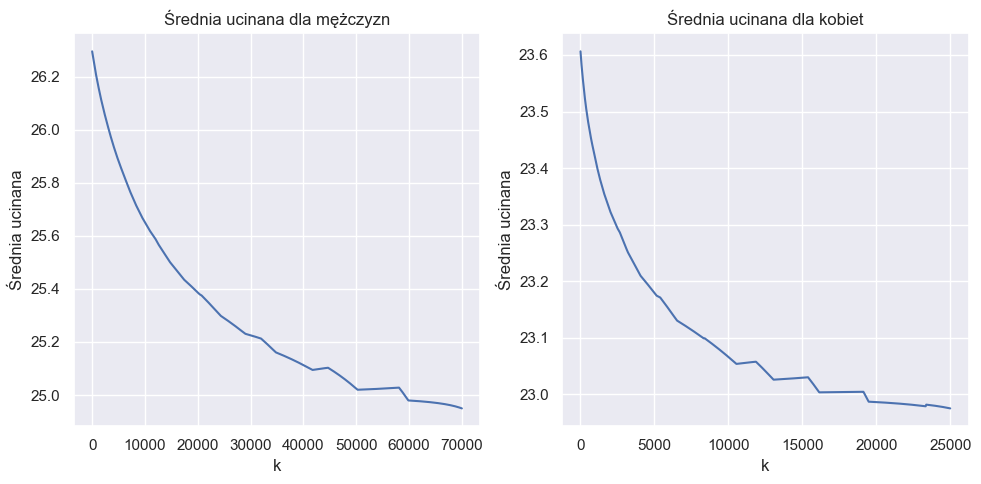

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def srednia_ucinana(dane, k):
    n = len(dane)
    poczatek = k
    koniec = n - k
    posortowane_dane = np.sort(dane)
    obcieta = posortowane_dane[poczatek:koniec]
    return (1 / (n - (2 * k))) * np.sum(obcieta)

# Usunięcie wartości nieliczbowych z kolumny 'Age'
dane['Age'] = pd.to_numeric(dane['Age'], errors='coerce')

# Usunięcie wierszy zawierających wartości NaN w kolumnie 'Age'
dane = dane.dropna(subset=['Age'])

# Konwersja kolumny 'Age' na liczby całkowite
dane['Age'] = dane['Age'].astype(int)

# Filtrowanie danych dla kobiet i mężczyzn
mezczyzni = dane[(dane['Sex'] == 'M') & (dane['Age'] < 60) & (dane['Season'] == 'Summer')]
kobiety = dane[(dane['Sex'] == 'F') & (dane['Age'] < 60) & (dane['Season'] == 'Summer')]

# Tworzenie listy wartości k dla mężczyzn i kobiet
k_values_m = np.arange(1, 70000, 10)
k_values_f = np.arange(1, 25000, 10)

# Obliczanie średnich uciętych dla różnych wartości k dla mężczyzn i kobiet
ucinane_means_m = [srednia_ucinana(mezczyzni['Age'], k) for k in k_values_m]
ucinane_means_f = [srednia_ucinana(kobiety['Age'], k) for k in k_values_f]

# Tworzenie wykresów dla mężczyzn i kobiet
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values_m, ucinane_means_m)
plt.title("Średnia ucinana dla mężczyzn")
plt.xlabel("k")
plt.ylabel("Średnia ucinana")

plt.subplot(1, 2, 2)
plt.plot(k_values_f, ucinane_means_f)
plt.title("Średnia ucinana dla kobiet")
plt.xlabel("k")
plt.ylabel("Średnia ucinana")

plt.tight_layout()
plt.show()


C:\Users\roksa\AppData\Local\Temp\ipykernel_3196\2276577643.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Age', data=age_m, palette='husl', showfliers=False)


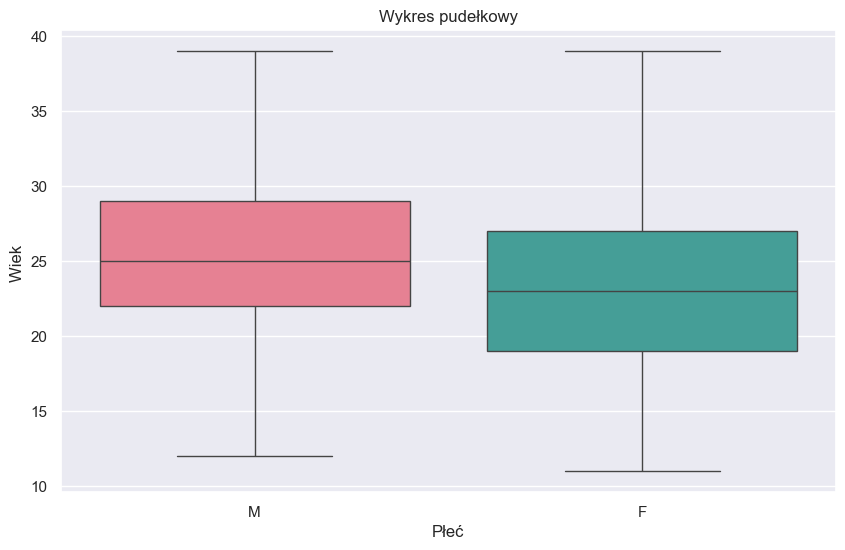

In [215]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrowanie danych
age_m = dane.dropna(subset=['Age']).loc[dane['Season'] == 'Summer']

# Wykres pudełkowy
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Age', data=age_m, palette='husl', showfliers=False)
plt.title('Wykres pudełkowy')
plt.xlabel('Płeć')
plt.ylabel('Wiek ')
plt.show()


In [26]:
import numpy as np

# Wybierz dane dotyczące mężczyzn i kobiet poniżej 60 roku życia i latem
mezczyzni = dane.loc[(dane['Sex'] == 'M') & (dane['Age'] < 60) & (dane['Season'] == 'Summer'), 'Age']
kobiety = dane.loc[(dane['Sex'] == 'F') & (dane['Age'] < 60) & (dane['Season'] == 'Summer'), 'Age']

# Oblicz kwantyle
quantiles1 = np.percentile(kobiety, [25, 50, 75])
quantiles2 = np.percentile(mezczyzni, [25, 50, 75])

print("Liczba brakujących wartości dla kobiet:", kobiety.isnull().sum())
print("Liczba brakujących wartości dla mężczyzn:", mezczyzni.isnull().sum())


kobiety_median = kobiety.fillna(kobiety.median())
mezczyzni_median = mezczyzni.fillna(mezczyzni.median())


quantiles1 = np.percentile(kobiety_median, [25, 50, 75])
quantiles2 = np.percentile(mezczyzni_median, [25, 50, 75])

print("Kwantyle dla kobiet (z zastąpionymi brakującymi wartościami):")
print("25 percentyl:", quantiles1[0])
print("Mediana:", quantiles1[1])
print("75 percentyl:", quantiles1[2])

print("\nKwantyle dla mężczyzn (z zastąpionymi brakującymi wartościami):")
print("25 percentyl:", quantiles2[0])
print("Mediana:", quantiles2[1])
print("75 percentyl:", quantiles2[2])



Liczba brakujących wartości dla kobiet: 0
Liczba brakujących wartości dla mężczyzn: 0
Kwantyle dla kobiet (z zastąpionymi brakującymi wartościami):
25 percentyl: 19.0
Mediana: 23.0
75 percentyl: 27.0

Kwantyle dla mężczyzn (z zastąpionymi brakującymi wartościami):
25 percentyl: 22.0
Mediana: 25.0
75 percentyl: 29.0


In [27]:
import numpy as np
from scipy.stats import iqr, kurtosis, skew


# Rozstęp (range)
range_height1 = np.ptp(mezczyzni)
range_height2 = np.ptp(kobiety)
print("Rozstęp dla height1:", range_height1)
print("Rozstęp dla height2:", range_height2)

# Rozstęp międzykwartylowy (IQR)
iqr_height1 = iqr(mezczyzni)
iqr_height2 = iqr(kobiety)
print("IQR dla height1:", iqr_height1)
print("IQR dla height2:", iqr_height2)

# Współczynnik zmienności (coefficient of variation)
cv_height1 = np.std(mezczyzni)/ np.mean(mezczyzni)
cv_height2 = np.std(kobiety) / np.mean(kobiety)
print("Współczynnik zmienności dla height1:", cv_height1)
print("Współczynnik zmienności dla height2:", cv_height2)

# Kurtoza (kurtosis)
kurtosis_height1 = kurtosis(mezczyzni)
kurtosis_height2 = kurtosis(kobiety)
print("Kurtoza dla height1:", kurtosis_height1)
print("Kurtoza dla height2:", kurtosis_height2)

# Skośność (skewness)
skewness_height1 = skew(mezczyzni)
skewness_height2 = skew(kobiety)
print("Skośność dla height1:", skewness_height1)
print("Skośność dla height2:", skewness_height2)

# Wariancja (variance)
variance_height1 = np.var(mezczyzni)
variance_height2 = np.var(kobiety)
print("Wariancja dla height1:", variance_height1)
print("Wariancja dla height2:", variance_height2)

# Odchylenie standardowe (standard deviation)
std_deviation_height1 = np.std(mezczyzni)
std_deviation_height2 = np.std(kobiety)
print("Odchylenie standardowe dla height1:", std_deviation_height1)
print("Odchylenie standardowe dla height2:", std_deviation_height2)


Rozstęp dla height1: 49
Rozstęp dla height2: 48
IQR dla height1: 7.0
IQR dla height2: 8.0
Współczynnik zmienności dla height1: 0.24116689106492248
Współczynnik zmienności dla height2: 0.24775766845469965
Kurtoza dla height1: 3.317582917554158
Kurtoza dla height2: 2.115655999022196
Skośność dla height1: 1.5158669851698188
Skośność dla height2: 1.004710215109042
Wariancja dla height1: 40.21669683851535
Wariancja dla height2: 34.20815524151055
Odchylenie standardowe dla height1: 6.3416635702720265
Odchylenie standardowe dla height2: 5.8487738237608875


: 